# Exploring the Rössler Strange Attractor with Python I
## Simple Integration using Euler's method

This is a quick intro, and hopefully part of a longer series on using Python to analyze the Rössler Strange Attractor.

We begin by importing the basic libraries that we will use as follows:

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Define Rössler System

Next we define a python function which will define the Rössler equations for us to integrate and graph. The Rössler equestions are

$$ \dot{x} = -y -z $$
$$ \dot{y} =  x + ay $$
$$ \dot{z} = b + z(x-c) $$

They function over a number of parameters, something we will explore in more detail in future posts. For now, let's just pick a pretty common set of parameters:

In [2]:
def rossler(x, y, z, a=0.2, b=0.2, c=5.7):
    x_dot = - y - z
    y_dot = x + a*y
    z_dot = b + z*(x-c)
    return x_dot, y_dot, z_dot

### Numerical Integration

These equations can't be solved for non-trivial sets of parameters, so we must integrate them numerically. Here, we use a very simpler Euler's method of integration to get us out the door. This method is _never_ a good idea to use for non-trivial applications, but is a quick easy way to get started.

Euler's method makes use of the definition of a derivative:

$$\dot{x} = \frac{dx}{dt} = \lim_{\Delta \rightarrow 0} \frac{\Delta x}{\Delta t} $$

To create a simplistic way to numerical integrate where:

$$ \Delta x = \dot{x} \Delta t $$

This isn't very accurate over the long term, but with small enough $\Delta t$ can give a fair approximation in the short term. For this simple demo, we choose to let $dt = 0.05 s$ and choose to plot 1000 points for a total of 50 seconds of data. 

In [3]:
dt = 0.05
stepCnt = 1000

Next we set up NUMPY arrays that will hold the 1000 points for each dimension, and then set intitial values (what initial values to use will be explained in more detail in a post where we discuss the parameters as well).

In [4]:
# Need one more for the initial values
xs = np.empty((stepCnt + 1,))
ys = np.empty((stepCnt + 1,))
zs = np.empty((stepCnt + 1,))

In [5]:
# Setting initial values
xs[0], ys[0], zs[0] = (0.1, 1., 1.05)

Next, we run the Euler's method integration to populate the arrays:

In [6]:
# Stepping through "time".
for i in range(stepCnt):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = rossler(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

# Plot

Our final step is to plot the results so that we can see the `trajetory` of the Rössler system over these 50 seconds of integration.

Text(0.5, 0.92, 'Rössler')

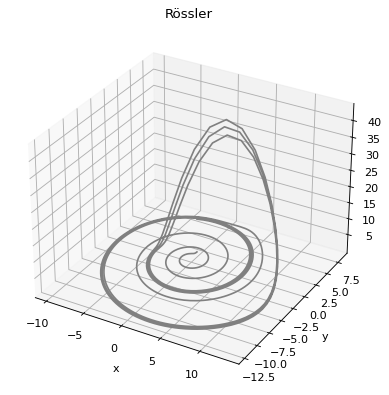

In [10]:
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(xs, ys, zs, 'gray')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Rössler')